# Scenemixer
Tool for combining two photographs into a composite image (center + surrounding).

In [1]:
from __future__ import division
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

### Settings

In [2]:
image_folder = "./images/"  # must end with /
# filenames in []
image_in     = ["nature.jpeg", "sarka.jpeg", "helsinki.jpeg"]  
                                                
image_out    = image_in     # use the same as image_in
new_size     = (1024, 1024) # in pixels (width, height)
radius       = 400.0        # radius of central/inside area

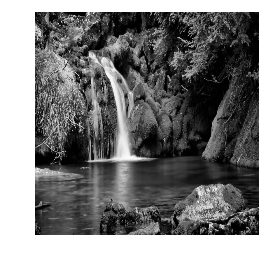

In [3]:
def crop_and_resize_image(img, new_size, grayscale = False):
    height, width, channels = img.shape
    fx = new_size[0] / width
    fy = new_size[1] / height
    fxy = np.max([fx, fy])
    # half of cropsize
    csize2    = (int(np.floor(new_size[1] / fxy / 2)), int(np.floor(new_size[0] / fxy / 2)))
    center    = (width // 2, height // 2)
    img_cropped = img[(center[1] - csize2[1]):(center[1] + csize2[1]),
                      (center[0] - csize2[0]):(center[0] + csize2[0]), :]
    img_resized = cv2.resize(img,(new_size[1], new_size[0]), interpolation = cv2.INTER_CUBIC)
    if grayscale:
        img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2BGR) # keep all channels
    return img_resized

def show_image(image):
    plt.axis("off")
    if len(image.shape) > 2:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap = cm.Greys_r)
    plt.show()

   
ima = cv2.imread(image_folder + image_in[0], cv2.CV_LOAD_IMAGE_COLOR)
imb = cv2.imread(image_folder + image_in[1], cv2.CV_LOAD_IMAGE_COLOR)
ia = crop_and_resize_image(ima, new_size, True)
ib = crop_and_resize_image(imb, new_size, True)

show_image(ia)

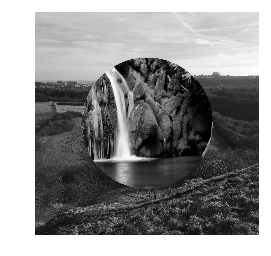

True

In [4]:
def combine_images(img_in, img_out, radius):
    assert img_in.shape == img_out.shape
    h = img_in.shape[0]
    w = img_in.shape[1]
    x = np.arange(0, w); y = np.arange(0, h)
    xx, yy = np.meshgrid(x, y)
    mask_in = np.sqrt((xx - w // 2) ** 2 + (yy - h // 2) ** 2) <= radius
    img_new = np.zeros(img_in.shape, dtype = np.uint8)
    img_new[mask_in] = img_in[mask_in]
    img_new[np.logical_not(mask_in)] = img_out[np.logical_not(mask_in)]
    return img_new
 
ii = combine_images(ia, ib, 300)
show_image(ii)
cv2.imwrite("test.jpeg", ii)

In [5]:
def add_ring(img, radius, width, colour = (0,0,0), blur = 0):
    h = img.shape[0]
    w = img.shape[1]
    x = np.arange(0, w); y = np.arange(0, h)
    imr = np.zeros((h, w, 4), dtype = np.uint8)
    cv2.circle(imr, (w // 2, h // 2), radius, (128, 128, 128, 255), width)    
    if blur > 0:
        imr = cv2.blur(imr, (blur, blur))
        #imr = cv2.GaussianBlur(imr, ksize = (0, 0), sigmaX = blur)
    return imr

iw = add_ring(ii, 300, 70, blur = 50)
a = iw[:,:,3]
a = a.reshape((a.shape[0], a.shape[1], 1)) / 255.
dst = ii[:,:,:3] * (1 - a) + iw[:,:,:3] * a + 0
dst = dst.astype(np.uint8)
cv2.imwrite("test3.png", dst)

True